In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

AttributeError: module 'cgi' has no attribute 'escape'

Software versions
Python 3.9.1 64bit [GCC 5.4.0 20160609]
IPython 7.19.0
OS Linux 5.8.0 0.bpo.2 amd64 x86_64 with glibc2.28
pandas 1.2.0
matplotlib 3.3.3
seaborn 0.11.1
Sun Jan 10 13:42:35 2021 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'XLM'

In [5]:
def datetime_xlm_supply_curve(num_weeks):
    supply = [
        # Total distribution,
    ]
    start_date = datetime.datetime(2015, 9, 30)
    y = 2 * 1e9
    weekly_inflation = 0.01 / 52
    weekly_distribution = (98 * 1e9) / (52 * 13)
    supply.append([y])
    for week in range(num_weeks):
        y += y * weekly_inflation
        if week < (13 * 52):
            y += weekly_distribution
        supply.append([y])
    
    df = pd.DataFrame(
        supply, columns=['total_supply']
    )
    df['total_supply_pct'] = (
        df['total_supply'] / df['total_supply'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq='W',
        periods=len(df)
    )
    return df

In [6]:
supply = datetime_xlm_supply_curve(num_weeks=1200)

display(supply.head())
display(supply.tail())

,total_supply,total_supply_pct,date
0,2.000000e+09,1.691231,2015-10-04
1,2.145355e+09,1.814146,2015-10-11
2,2.290738e+09,1.937084,2015-10-18
3,2.436149e+09,2.060046,2015-10-25
4,2.581588e+09,2.183031,2015-11-01


,total_supply,total_supply_pct,date
1196,1.181661e+11,99.923114,2038-09-05
1197,1.181888e+11,99.942330,2038-09-12
1198,1.182116e+11,99.961550,2038-09-19
1199,1.182343e+11,99.980773,2038-09-26
1200,1.182570e+11,100.000000,2038-10-03


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

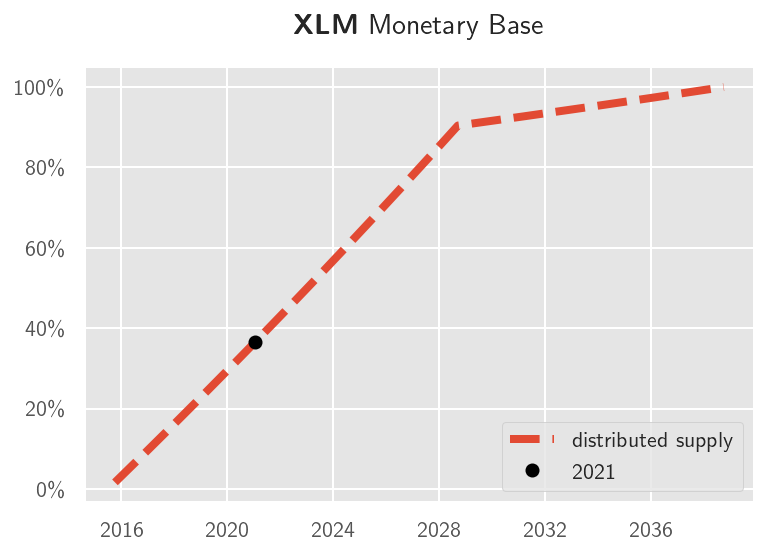

In [7]:
cmb.plot_supply_curve(
    supply,
    'XLM',
    fmt='--',
    plot_pct=True,
    out_name='XLM_short',
);

In [8]:
supply = datetime_xlm_supply_curve(num_weeks=6350)
display(supply.head())
display(supply.tail())

,total_supply,total_supply_pct,date
0,2.000000e+09,0.628240,2015-10-04
1,2.145355e+09,0.673899,2015-10-11
2,2.290738e+09,0.719567,2015-10-18
3,2.436149e+09,0.765244,2015-10-25
4,2.581588e+09,0.810929,2015-11-01


,total_supply,total_supply_pct,date
6346,3.181047e+11,99.923114,2137-05-19
6347,3.181659e+11,99.942330,2137-05-26
6348,3.182271e+11,99.961550,2137-06-02
6349,3.182883e+11,99.980773,2137-06-09
6350,3.183495e+11,100.000000,2137-06-16


<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

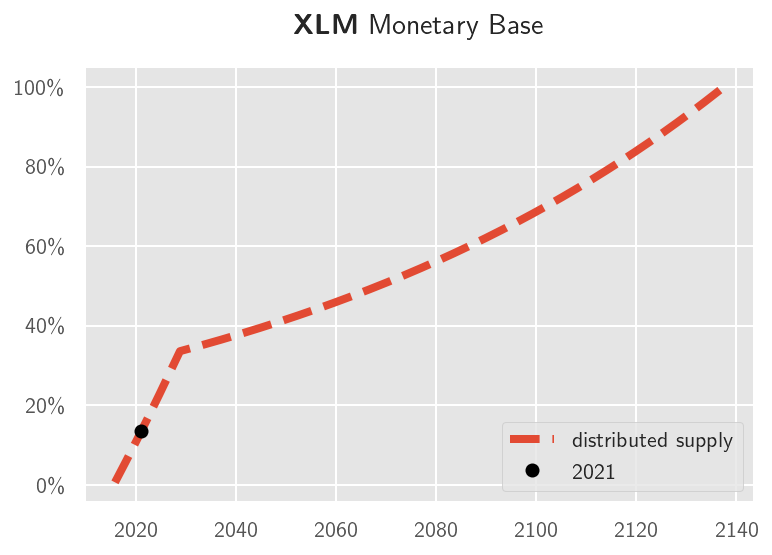

In [9]:
cmb.plot_supply_curve(
    supply,
    'XLM',
    fmt='--',
    plot_pct=True,
    out_name='XLM_long_pct',
);

<module 'matplotlib.pyplot' from '/home/lane/.local/share/virtualenvs/crypto-monetary-base-xxmj4jsc/lib/python3.9/site-packages/matplotlib/pyplot.py'>

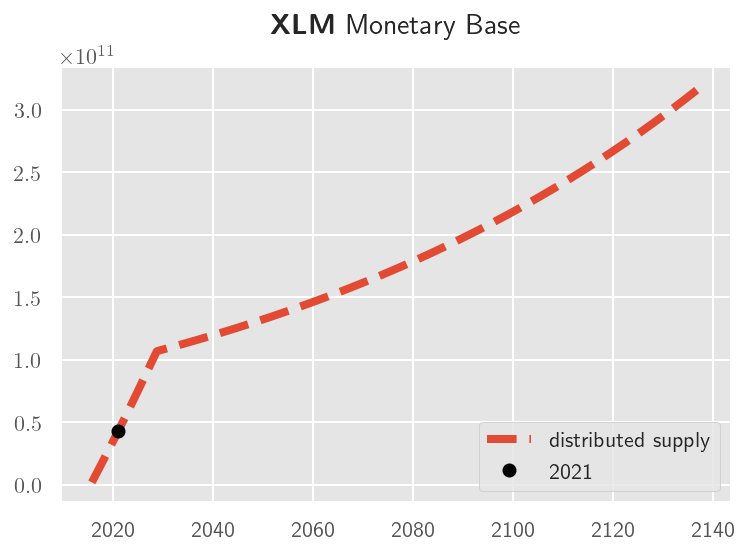

In [10]:
cmb.plot_supply_curve(
    supply,
    'XLM',
    fmt='--',
    plot_pct=False,
    out_name='XLM_long',
);

## Standardize Time Series

In [11]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 6351 lines to file ../output-data/XLM_weekly.csv


,coin,total_supply,total_supply_pct,date
0,XLM,2.000000e+09,0.628240,2015-10-01
1,XLM,2.145355e+09,0.673899,2015-10-01
2,XLM,2.290738e+09,0.719567,2015-10-01
3,XLM,2.436149e+09,0.765244,2015-10-01
4,XLM,2.581588e+09,0.810929,2015-11-01


,coin,total_supply,total_supply_pct,date
6346,XLM,3.181047e+11,99.923114,2137-05-01
6347,XLM,3.181659e+11,99.942330,2137-05-01
6348,XLM,3.182271e+11,99.961550,2137-06-01
6349,XLM,3.182883e+11,99.980773,2137-06-01
6350,XLM,3.183495e+11,100.000000,2137-06-01


In [12]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1461 lines to file ../output-data/XLM_monthly.csv


,coin,total_supply,total_supply_pct,date
0,XLM,2.000000e+09,0.628240,2015-10-01
1,XLM,2.581588e+09,0.810929,2015-11-01
2,XLM,3.309202e+09,1.039487,2015-12-01
3,XLM,3.891797e+09,1.222492,2016-01-01
4,XLM,4.620672e+09,1.451446,2016-02-01


,coin,total_supply,total_supply_pct,date
1456,XLM,3.171885e+11,99.635317,2137-02-01
1457,XLM,3.174326e+11,99.711982,2137-03-01
1458,XLM,3.177379e+11,99.807896,2137-04-01
1459,XLM,3.179824e+11,99.884693,2137-05-01
1460,XLM,3.182271e+11,99.961550,2137-06-01


In [13]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 123 lines to file ../output-data/XLM_yearly.csv


,coin,total_supply,total_supply_pct,date
0,XLM,2.000000e+09,0.628240,2015-10-01
1,XLM,3.891797e+09,1.222492,2016-01-01
2,XLM,1.150645e+10,3.614409,2017-01-01
3,XLM,1.934630e+10,6.077061,2018-01-01
4,XLM,2.711626e+10,8.517763,2019-01-01


,coin,total_supply,total_supply_pct,date
118,XLM,3.044597e+11,95.636935,2133-01-01
119,XLM,3.075193e+11,96.598009,2134-01-01
120,XLM,3.106096e+11,97.568741,2135-01-01
121,XLM,3.137310e+11,98.549229,2136-01-01
122,XLM,3.169447e+11,99.558711,2137-01-01
